In [1]:
#libraries 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from IPython.display import Image

In [2]:
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Personality.csv')    #It will read csv file

In [5]:
X = df[['movie_preferences', 'social_media_activity', 'reading_habits', 'favorite_leisure_activities', 'music_taste', 'fashion_style', 'travel_preferences']]
y = df['personality_behaviour']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [7]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
y_pred = rf.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6382857142857142


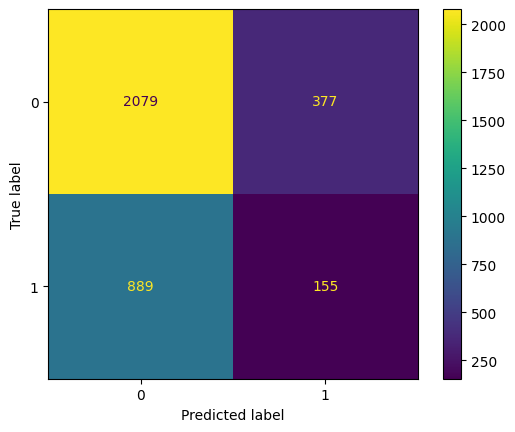

In [10]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Complex       0.70      0.85      0.77      2456
   Versatile       0.29      0.15      0.20      1044

    accuracy                           0.64      3500
   macro avg       0.50      0.50      0.48      3500
weighted avg       0.58      0.64      0.60      3500



In [12]:
cm1 = confusion_matrix(y_test, y_pred)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[2079  377]
 [ 889  155]]
Accuracy :  0.6382857142857142
Sensitivity :  0.8464983713355049
Specificity :  0.14846743295019157


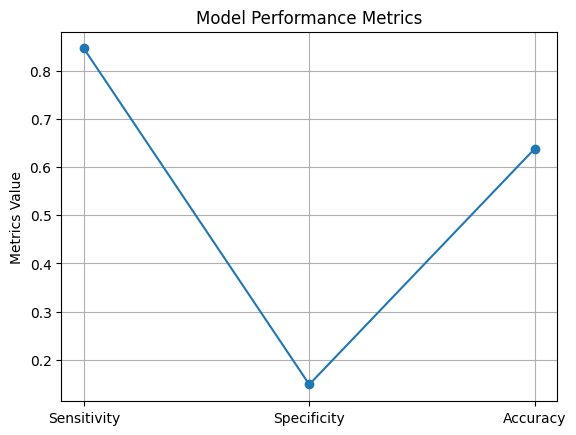

In [13]:
plt.plot(['Sensitivity', 'Specificity', 'Accuracy'], [sensitivity1, specificity1, accuracy], marker='o')

# Adding labels and title
plt.title('Model Performance Metrics')
plt.ylabel('Metrics Value')

# Display the plot
plt.grid(True)
plt.show()

In [14]:
print("F1-Score: ", f1_score(y_test, y_pred, average="weighted"))
print("Precision Score: ", precision_score(y_test, y_pred, average="weighted"))
print("Recall Score: ", recall_score(y_test, y_pred, average="weighted"))

F1-Score:  0.5966021549538912
Precision Score:  0.5784375493991042
Recall Score:  0.6382857142857142
